# F78DS - Data Science Life Cycle 
### Coursework 2
Arthur Grossmann Le Mauguen 

H00494101

1st of April 2025

## Introduction

### 1) Start with an introduction to the coursework.

In this coursework, we explore a dataset containing numerical characteristics of essays, aiming to uncover patterns and correlations between different textual features and their assigned scores. The dataset, "F78DS-Essay-Features.csv", provides various linguistic and structural attributes of essays, including word count, sentence structure, punctuation usage, and lexical diversity.

Our objective is to analyze these features to identify the most influential factors in determining essay quality. This will involve statistical analysis, data visualization, and predictive modeling to assess how different textual components contribute to the verall scoring of essays.

<u>Directory Structure:</u>  
To facilitate the reproducibility and organization of the project, the following directory structure is recommended:

project_root/  
│  
├── DataScienceLifeCycleCoursework2_ArthurGrossmannLeMauguen_H00494101.ipynb  
│  
├── data/  
│   ├── F78DS-Essay-Features.csv  
│   └── F78DS-Essay-Features-Submission.csv  
│  
└── models/

In [72]:
import os

# Define the folder names
folders = ['data', 'models']

# Create the folders if they do not exist
for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"Folder '{folder}' created.")
    else:
        print(f"Folder '{folder}' already exists.")


Folder 'data' already exists.
Folder 'models' created.


### 2) Importing the necessary libraries, read the file (‘F78DS-Essay-Features.csv‘), and provide some description of the data you have read (you do not need to repeat the description given in this file for each field).

In [49]:
# Library import to read the data from the csv file
import pandas as pd

In [50]:
# Store the data from the csv file into a pandas dataframe
df_Essay=pd.read_csv('data/F78DS-Essay-Features.csv')

To better understand the dataset we will use the following:

* describe(): Summarizes statistics (count, mean, min, max, quartiles) for numeric columns.
* head(): Displays the first 5 rows of the DataFrame
* dtypes: Displays the data type of each column in the Dataframe
* columns: Lists the column names of the Dataframe
* shape: Displays the dimensions of the Dataframe (rows, columns)

In [51]:
df_Essay.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [52]:
df_Essay.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [53]:
df_Essay.dtypes

essayid                        int64
chars                          int64
words                          int64
commas                         int64
apostrophes                    int64
punctuations                   int64
avg_word_length              float64
sentences                      int64
questions                      int64
avg_word_sentence            float64
POS                          float64
POS/total_words              float64
prompt_words                   int64
prompt_words/total_words     float64
synonym_words                  int64
synonym_words/total_words    float64
unstemmed                      int64
stemmed                        int64
score                          int64
dtype: object

In [54]:
df_Essay.columns

Index(['essayid', 'chars', 'words', 'commas', 'apostrophes', 'punctuations',
       'avg_word_length', 'sentences', 'questions', 'avg_word_sentence', 'POS',
       'POS/total_words', 'prompt_words', 'prompt_words/total_words',
       'synonym_words', 'synonym_words/total_words', 'unstemmed', 'stemmed',
       'score'],
      dtype='object')

In [55]:
df_Essay.shape

(1332, 19)

* The dataset contains **1,322 essays**. 
* Essays vary significantly in length, from as few as **169 characters (36 words)** to as many as **6142 characters (1,170 words)**.  
* The average word count is approximately **424 words**, with a maximum of **1170 words**.  
* Essays generally contain few questions, with an average of **1.22 questions per essay**.  
* The number of Part-of-Speech (POS) elements is closely related to the total word count, indicating a rich linguistic structure in longer essays.  
* The score distribution ranges **from 1 to 6**, with an average score of **3.42** and a median at **3** (more than half of the students have a grade of 3 or more, this students have passing grades in Heriot Watt University)

## 2) Supervised Learning

### 1) Explain supervised machine learning, the notion of labelled data, and the training and test datasets.

<u>**Supervised machine learning**</u> is a type of machine learning in which an algorithm learns to associate or map input data (labelled data, see next section for definition) with corresponding outputs. By identifying patterns in the provided examples, the model can then make **predictions** or **classify** new data points. The objective is to develop a model capable of generalizing effectively to unseen data by identifying **patterns** from past examples. This contrasts with unsupervised learning, where the model independently identifies features and structures the data.

In supervised learning, there are two main types of problems:

* Regression: Predicting a continuous value (e.g., predicting house prices based on square footage, grades based on the length of an essay).
* Classification: Assigning data points to categories or classes (e.g., determining if an email is spam or not, whether a picture features a cat or a dog).

<u>**Labelled Data**</u>  
Labelled data is a dataset where each input example (feature) is paired with a corresponding output (label or target variable). Label refers to the  expected output, what the model should predict using the features. This allows the unsupervised machine learning model to learn relationships between input features and their correct outputs.

In the F78DS-Essay-Features.csv dataset, each essay has numerical features (e.g., word count, characters count) as inputs and a score as the output label. The model can learn from these examples to predict the score of new essays.

<u>**Training and Test Datasets**</u>  
When building a supervised machine learning model, the dataset is typically divided into two subsets:

**Training Dataset**  
* Used to train the model by providing examples with known outputs.  
* The model learns patterns between features and labels in the data and adjusts its internal parameters. 

**Test Dataset**  
* Used to evaluate the model’s performance on unseen data.  
* Helps check if the model generalizes well (how well it can predict labels of data it has not seen before) and avoids overfitting (memorizing training data instead of learning general patterns).  
* In some cases, a validation dataset is also used to fine-tune the model by opimizing the hyperparameters before final testing(it's a separate subset of data used during training to fine-tune the model and prevent overfitting).  

Example in the Context of Essay Scoring  
* Training Data: A subset of essays with their features (e.g., word count, punctuation, sentence structure) and known scores.  
* Test Data: A different subset of essays with features but without exposing the scores to the model. The model predicts scores, which are then compared to actual scores to measure accuracy.

By using this approach, we can develop a machine learning model that predicts essay scores based on textual features.

### 2) Separate the features and the label (Hint: the label in this case is the ‘score’)

In [56]:
# Separate features (X) and label (y)
X = df_Essay.drop(columns=['score'])  # Features (all columns except 'score')
y = df_Essay['score']  # Label (target variable)

# Display the first few rows of features and labels
X.head(), y.head()

(   essayid  chars  words  commas  apostrophes  punctuations  avg_word_length  \
 0     1457   2153    426      14            6             0         5.053991   
 1      503   1480    292       9            7             0         5.068493   
 2      253   3964    849      19           26             1         4.669022   
 3      107    988    210       8            7             0         4.704762   
 4     1450   3139    600      13            8             0         5.231667   
 
    sentences  questions  avg_word_sentence         POS  POS/total_words  \
 0         16          0          26.625000  423.995272         0.995294   
 1         11          0          26.545455  290.993103         0.996552   
 2         49          2          17.326531  843.990544         0.994100   
 3         12          0          17.500000  207.653784         0.988828   
 4         24          1          25.000000  594.652150         0.991087   
 
    prompt_words  prompt_words/total_words  synonym_wo

### 3) Conduct feature selection (if appropriate) to improve the model performance

Feature selection is a crucial step in machine learning that helps improve model performance by identifying and retaining the most relevant features while reducing dimensionality and eliminating redundant or irrelevant data. One common approach is using a correlation matrix, which measures the relationships between features. We might need to fine-tune our features choice to improve accuracy.

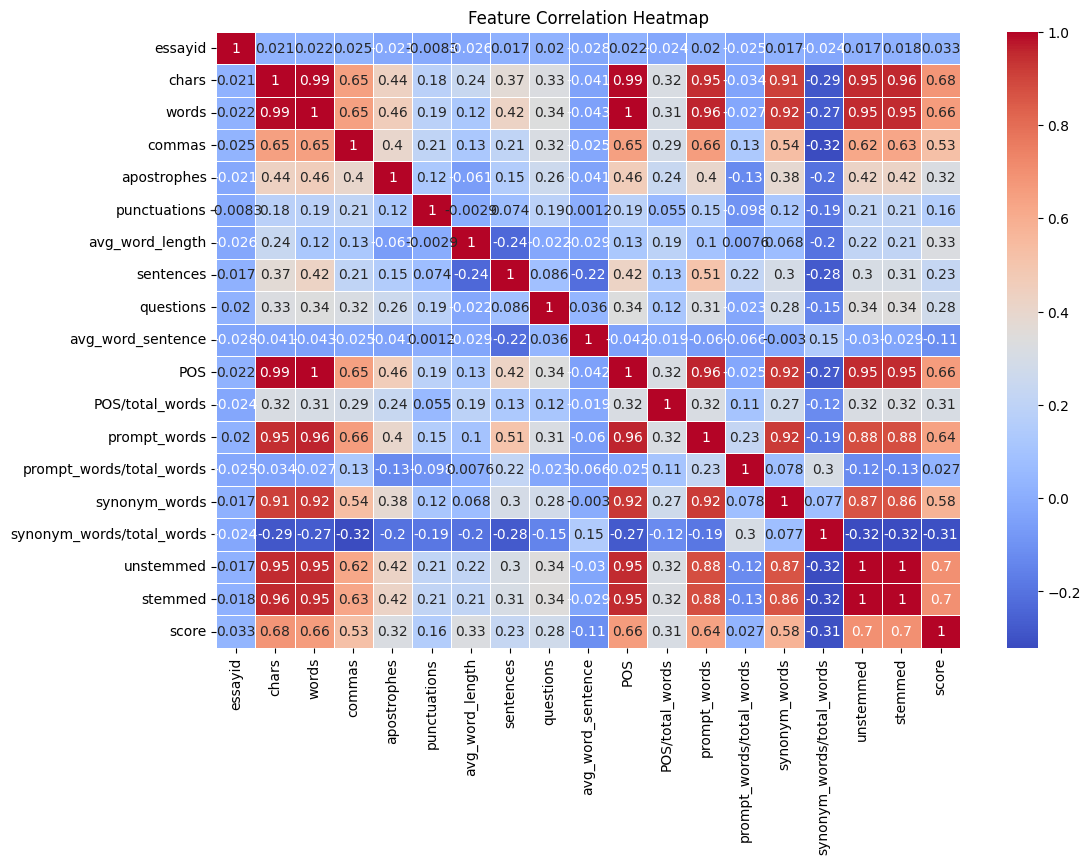

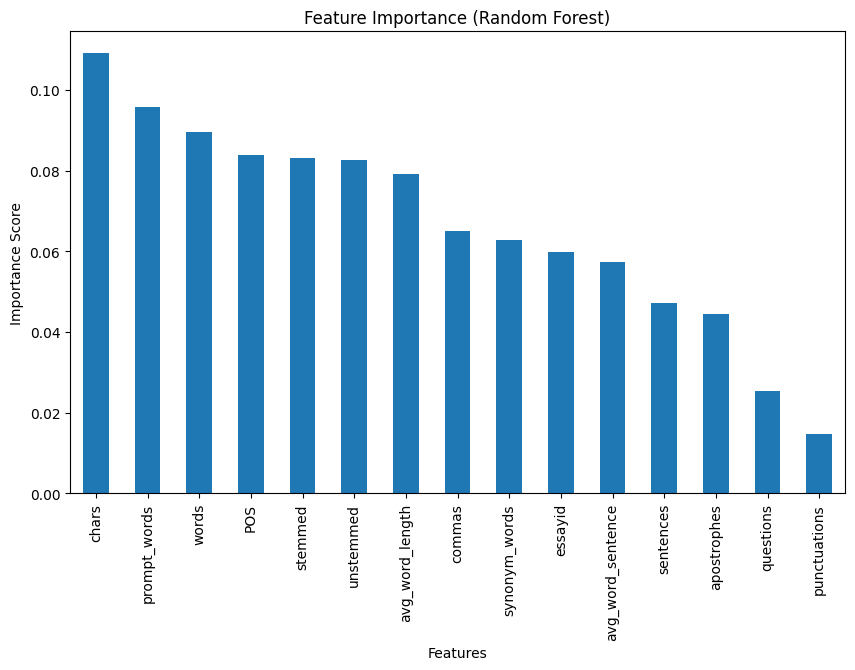

chars              0.109018
prompt_words       0.095753
words              0.089546
POS                0.083922
stemmed            0.083229
unstemmed          0.082740
avg_word_length    0.079050
commas             0.064929
synonym_words      0.062837
essayid            0.059921
dtype: float64

In [57]:
# Library import to conduct feature selection
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

# 1. Correlation Analysis (Heatmap)
plt.figure(figsize=(12, 8))
heatmap = df_Essay.corr()
#sns.heatmap(heatmap, annot=False, cmap="coolwarm", linewidths=0.5)
sns.heatmap(heatmap, annot=True, cmap="coolwarm", linewidths=0.5) # Display correlation values on heatmap with annot=True to display values
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Variance Threshold - Remove low variance features
selector = VarianceThreshold(threshold=0.01)  # Removing near-constant features
X_high_variance = selector.fit_transform(X)
# Get selected feature names
selected_features = X.columns[selector.get_support()]

# 3. Feature Importance using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X[selected_features], y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=selected_features)
top_features = feature_importances.sort_values(ascending=False)

# Plot Top Features
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Display top important features
top_features.head(10)

In [58]:
# Define selected features (excluding essayid as it's just an identifier)
selected_features = ["chars", "prompt_words", "words", "POS", "stemmed", "unstemmed", "avg_word_length", "commas", "synonym_words"]

### 4) Use the sklearn.model_selection.train_test_split function to split your data for training and testing.  Explain the parameters used in the function.

In [59]:
# Library import to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=0, stratify=y)

# Display the shape of training and testing sets to verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1065, 9), (267, 9), (1065,), (267,))

We used the train_test_split function from sklearn.model_selection to divide the dataset into training and testing subsets. The parameters used are:

* X[selected_features]: The selected features from the dataset, excluding irrelevant columns.
* y: The target variable (score).
* test_size=0.2: 20% of the data is allocated to the test set, while 80% is used for training.
* random_state=0: Ensures reproducibility by setting a fixed seed for random shuffling.
* stratify=y: Maintains the distribution of score across train and test sets, ensuring balanced representation.
* Dataset Split Summary
* Training Set: 1065 samples (80%)
* Testing Set: 267 samples (20%)
* Features Used: 9 (top 10 most relevant excluding essayid)

## 3) Classification

### 1) Explain the difference between binary and multi-class classification.

<u>**Binary Classification**</u>  
Binary classification involves predicting one of two possible classes (labels). The output is typically represented as 0 or 1, True or False, Positive or Negative.

Examples:
* Spam detection: Email is either "Spam" (1) or "Not Spam" (0).
* Medical diagnosis: A test result is "Positive" (disease detected) or "Negative" (no disease).
* Sentiment analysis: A review is classified as "Positive" or "Negative".

<u>**Multi-Class Classification**</u>  
Multi-class classification involves predicting one class out of three or more possible classes. Unlike binary classification, there are multiple categories, and each sample belongs to exactly one class.

Examples:
* Handwritten digit recognition: Classifying images into digits 0-9.
* Essay scoring (like our coursework): Predicting scores 1 to 6.
* Animal classification: Identifying if an image is a cat, dog, bird, or horse.

In our dataset, the "score" column ranges from 1 to 6, meaning we are dealing with a multi-class classification problem.

### 2) In preparation for Naive Bayes (NB) classification, your data should be normalised/scaled.

#### 1) Describe what you understand from this need to normalise data (this is in your Week 7 laboratory).

Normalization (or scaling) is a crucial preprocessing step in machine learning that ensures all features contribute equally to the model. It is especially important for models that rely on probabilities, like Naïve Bayes (NB), or those that are sensitive to differences in feature magnitudes.

Features in datasets often have different ranges. For example, the number of characters in an essay could be in the thousands, while the average word length might be between 3 and 10.
If left unscaled, features with larger numerical ranges may dominate the model, leading to biased learning.

Many machine learning algorithms, including Naïve Bayes, assume that features follow a similar scale for better probability calculations.  
Some distance-based models (like KNN and SVM) also perform better with normalized data.
Stabilizes Numerical Computations

Common Normalization Techniques:  
* <u>Min-Max Scaling (Normalization)</u>  
Rescales values to a fixed range, usually [0,1].  
Formula: 𝑋′=(𝑋−𝑋min)/(𝑋max−𝑋min)    
Best when feature distributions are not Gaussian (e.g., skewed data).  

* <u>Z-score Standardization (Mean Normalization)</u>  
Centers data around mean = 0 and scales it to unit variance.  
Formula: 𝑋′=(𝑋−𝜇)/𝜎   
Ideal for normally distributed (Gaussian) data.

* <u>Log Transformation</u>  
Useful for skewed data by reducing the impact of large values.  
Formula: 𝑋′=log(1+𝑋)  
Often used in text-based data, like word counts.

* <u>Robust Scaling</u>  
Scales data using the median and interquartile range (IQR), reducing the impact of outliers.


#### 2) Choose and use the appropriate normalisation functions available from sklearn.preprocessing and scale the data appropriately.

In [ ]:
# Library import to scale the data from sklearn.preprocessing, numpy for log transformation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer
import numpy as np

# Creation of all the scalers used for the transformation of the data 
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
quantile_transformer = QuantileTransformer(random_state=0)
robust_scaler = RobustScaler()
normalizer_scaler = Normalizer()

# MinMaxScaler
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)
# StandardScaler
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
# QuantileTransformer
X_train_quantile = quantile_transformer.fit_transform(X_train)
X_test_quantile = quantile_transformer.transform(X_test)
# RobustScaler
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)
# Normalizer
X_train_norm = normalizer_scaler.fit_transform(X_train)
X_test_norm = normalizer_scaler.transform(X_test)
# Log transformation
X_train_log = np.log1p(X_train)  # log1p(x) is equivalent to log(x + 1)
X_test_log = np.log1p(X_test)
"""
# QuantileTransformer (Model Accuracy: 0.4232)
normalised_X_train = X_train_quantile
normalised_X_test = X_test_quantile
# MinMaxScaler (Model Accuracy: 0.5243)
normalised_X_train = X_train_min_max
normalised_X_test = X_test_min_max
# StandardScaler (Model Accuracy: 0.5243)
normalised_X_train = X_train_standard
normalised_X_test = X_test_standard
# RobustScaler (Model Accuracy: 0.5243)
normalised_X_train = X_train_robust
normalised_X_test = X_test_robust
"""
# Best results with the following scaler:
# Normalizer (Model Accuracy: 0.6030)
normalised_X_train = X_train_norm
normalised_X_test = X_test_norm
"""
# Log transformation (Model Accuracy: 0.5730)
normalised_X_train = X_train_log
normalised_X_test = X_test_log
"""

### 3) Use the Naive Bayes (NB) algorithm to build the model.

#### 1) Describe NB.  Again, this is not in your lecture content, you need to do some self-learning.

Naïve Bayes (NB) is a probabilistic classification algorithm based on Bayes' Theorem and conditionnal probabilities, assuming that features are conditionally independent given the class label, meaning each feature contributes to the classification decision without depending on the others. Despite this strong assumption, which gives the algorithm its "naïve" name, it performs well in many practical applications, especially in text classification and natural language processing (NLP) by simplifying computations which makes it highly efficient for large datasets.

Bayes’ Theorem
The core of NB is Bayes' Theorem: P(A∣B)=(P(B∣A)xP(A))/P(B)
 
Where:  
* P(A∣B) is the probability of class A given feature B (posterior probability).
* P(B∣A) is the probability of feature B given class A (likelihood).
* P(A) is the prior probability of class A.
* P(B) is the prior probability of feature B.


#### 2) Explain the differences between the 4 models for Naive Bayes provided by sklearn.naive_bayes.  From your understanding, which model would be most appropriate for this coursework and state clearly why.


Types of Naïve Bayes Models in sklearn.naive_bayes
Scikit-learn provides four types of Naïve Bayes classifiers:

| Model          | Description                                                             | Suitable for                                    |
|---------------|-------------------------------------------------------------------------|------------------------------------------------|
| GaussianNB    | Assumes that features follow a normal (Gaussian) distribution. It is suitable for discrete features, like word frequencies in text classification         | Continuous numeric data (e.g., height, weight, scores). |
| MultinomialNB | Works with discrete count data, assuming features follow a multinomial distribution. | Text classification (word frequency, term counts). |
| BernoulliNB   | Suitable for binary/boolean features, where each feature is either 0 or 1. | Binary text features (e.g., presence/absence of words). |
| ComplementNB  | Variant of MultinomialNB, designed to handle imbalanced data.          | Imbalanced text classification tasks.          |

Since our dataset contains numerical continuous features (e.g., chars, words, sentences), the most appropriate choice is Gaussian Naïve Bayes (GaussianNB), as it assumes a normal distribution for numerical data.

#### 3) Write the code to build the model using your training dataset.

In [61]:
# Library import for Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GaussianNB classifier
nb_classifier = GaussianNB()

# Train the model using the scaled training dataset
nb_classifier.fit(normalised_X_train, y_train)

GaussianNB()

### 4) Predict

#### 1) Using the testing dataset you created in 2(c) above, conduct the prediction for the ‘score’ (label).

In [62]:
# Predict on the test set
y_pred = nb_classifier.predict(normalised_X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.5880
              precision    recall  f1-score   support

           1       0.29      0.67      0.40         3
           2       0.58      0.32      0.41        22
           3       0.64      0.60      0.62       112
           4       0.62      0.68      0.65       117
           5       0.14      0.17      0.15        12
           6       0.00      0.00      0.00         1

    accuracy                           0.59       267
   macro avg       0.38      0.40      0.37       267
weighted avg       0.60      0.59      0.59       267



#### 2) Display the confusion matrix (it should look like a 6x6 matrix).  Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification.

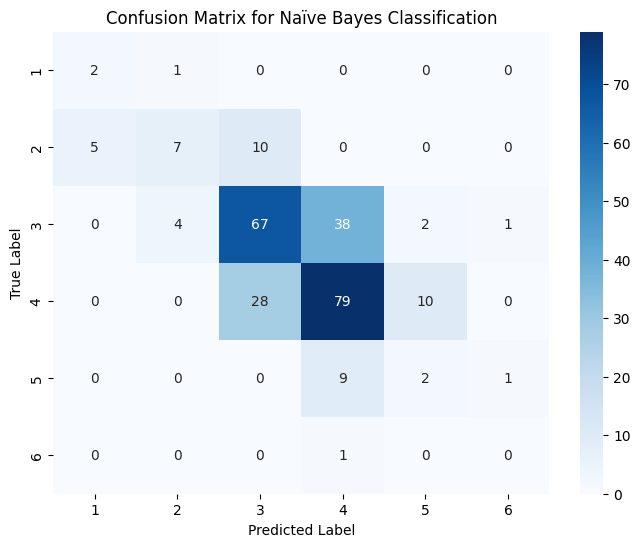

In [63]:
# Library import for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the trained Naïve Bayes model
y_pred = nb_classifier.predict(normalised_X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naïve Bayes Classification")
plt.show()

<b>Understanding the Confusion Matrix</b>  
* Rows represent the true classes (actual labels)
* Columns represent the predicted classes (model predictions)
* Diagonal elements represent correct classifications (true positives)
* Off-diagonal elements indicate misclassifications

<b>Class-wise Breakdown</b>

<u>Class 1</u>  
Correctly classified: 2 instances.

Misclassified as:

- Class 2 (1 instance).

Observation: Very few samples in this class, which could lead to an imbalanced classification issue.

<u>Class 2</u>  
Correctly classified: 7 instances.

Misclassified as:

- Class 1 (5 instances).

- Class 3 (10 instances).

Observation: The model struggles to distinguish between Class 1, Class 2 and Class 3.

<u>Class 3</u>  
Correctly classified: 67 instances.

Misclassified as:

- Class 2 (4 instances).

- Class 4 (38 instances) → Major confusion.

- Class 5 (2 instances).

- Class 6 (1 instance).

Observation: Heavy misclassification with Class 3, indicating overlapping features.

<u>Class 4</u>  
Correctly classified: 79 instances.

Misclassified as:

- Class 3 (28 instances).

- Class 5 (10 instances).

Observation: Some confusion with Class 3, but overall good classification.

<u>Class 5</u>  
Correctly classified: 2 instances.

Misclassified as:

- Class 4 (9 instances).

- Class 6 (1 instances).

Observation: More samples were misclassified than correctly classified, indicating poor separation.

<u>Class 6</u>  
Correctly classified: 0 instances.

Misclassified as:

- Class 4 (1 instance).

Observation: This class has very few data points, likely causing misclassification issues.

#### 3) Explain Quadratic Weighted Kappa (QWK).  Again, this is not in your lectures.

Quadratic Weighted Kappa (QWK) is a statistical metric that measures the agreement between two raters (e.g., a human evaluator and an AI model) while accounting for the degree of disagreement. It is widely used in ordinal classification tasks, such as essay scoring, medical diagnoses, and rating predictions, where the order of classes matters.

Why Use QWK Instead of Accuracy?  
* Accuracy does not consider how far off the prediction is.
* QWK penalizes predictions more severely when they are further from the true label.
* This makes QWK a better metric for evaluating models in ordinal classification problems (e.g., rating scales 1-6).

How QWK Works?  
QWK compares the observed agreement between predictions and true labels with the expected agreement if both were random guesses.  
The formula is: 𝜅-1=(∑𝑖,𝑗 𝑊𝑖,𝑗 𝑂𝑖,𝑗)/(∑𝑖,𝑗 𝑊𝑖,𝑗 𝐸𝑖,𝑗)​
 
Where:
* 𝑂𝑖,𝑗 is the observed frequency of class 𝑖 being predicted as class 𝑗.
* 𝐸𝑖,𝑗 is the expected frequency if predictions were random.
* 𝑊𝑖,𝑗 is the quadratic weight, which penalizes larger disagreements more than smaller ones.

The weight matrix W is defined as: 𝑊𝑖,𝑗=(𝑖−𝑗)**2/(𝑁−1)**2
 
Where:
* 𝑖 and 𝑗 are the true and predicted class labels.
* 𝑁 is the number of possible classes.

Interpreting QWK Scores 
* 𝜅=1: Perfect agreement (model predicts exactly like a human rater).
* 𝜅=0: Model performs no better than random chance.
* 𝜅<0: Model is worse than random guessing. 

| QWK Score     | Agreement Level               |
|--------------|------------------------------|
| 0.81 – 1.00  | Almost perfect               |
| 0.61 – 0.80  | Substantial                  |
| 0.41 – 0.60  | Moderate                     |
| 0.21 – 0.40  | Fair                         |
| 0.00 – 0.20  | Slight                       |
| < 0.00       | Poor (worse than random)     |

Why is QWK Useful for This Coursework?  
Since we are predicting essay scores (1-6), which follow an ordinal scale, QWK is a much better metric than simple accuracy. It ensures that a prediction of "5" instead of "6" is penalized less than a prediction of "1" instead of "6".

#### 4) Use the sklearn.metrics library to code and obtain the QWK score.

In [64]:
# Library import for Quadratic Weighted Kappa (QWK) score
from sklearn.metrics import cohen_kappa_score

# Compute the Quadratic Weighted Kappa (QWK) score
qwk_score = cohen_kappa_score(y_test, y_pred, weights="quadratic")

# Display the QWK score
qwk_score

np.float64(0.6171200162596119)

### 5) Use a more complex algorithm, Random Forest, to build an alternative model.

#### 1) Conduct steps 3.3 and 3.4 above to obtain an alternative model's results.

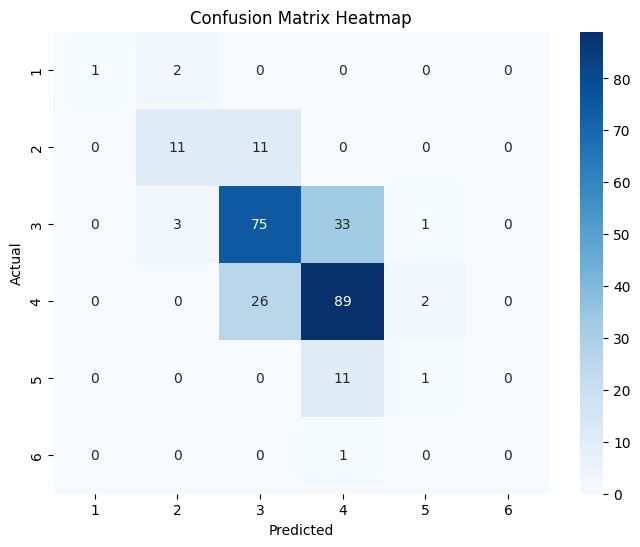

np.float64(0.6447795116272623)

In [69]:
# Load the dataset again
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and the label (y)
X = df.drop(columns=["score", "essayid"])  # Features (excluding essayid and score)
y = df["score"]  # Label

# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_classifier.fit(normalised_X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(normalised_X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Compute QWK score
qwk_score_rf = cohen_kappa_score(y_test, y_pred_rf, weights="quadratic")

# Plot heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Return results
qwk_score_rf

<b>Class-wise Breakdown</b>

<u>Class 1</u>

Correctly classified: 1 instance.  

Misclassified as:  

- Class 2 (2 instances)  

Observation: Very few samples in this class, which could lead to an imbalanced classification issue.

<u>Class 2</u>

Correctly classified: 11 instances.

Misclassified as:

- Class 3 (11 instances)  

Observation: The model struggles to distinguish between Class 2 and Class 3.

<u>Class 3</u>

Correctly classified: 75 instances.

Misclassified as:

- Class 2 (3 instances).

- Class 4 (33 instances) → Major confusion.

- Class 5 (1 instance).

Observation: Heavy misclassification with Class 3, indicating overlapping features with Class 4.

<u>Class 4</u>

Correctly classified: 89 instances.

Misclassified as:

- Class 3 (26 instances).

- Class 5 (2 instances).

Observation: Some confusion with Class 3, but overall good classification.

<u>Class 5</u>

Correctly classified: 1 instance.

Misclassified as:

- Class 4 (11 instances).

Observation: More samples were misclassified than correctly classified, indicating poor separation.

<u>Class 6</u>

Correctly classified: 0 instances.

Misclassified as:

- Class 4 (1 instance).

Observation: This class has very few data points, likely causing misclassification issues.

#### 2) Briefly explain why this alternate model performs worse or better than the Naive Bayes model.

The Random Forest model performed better than the Naïve Bayes model. Here’s why:

Random Forest Captures Complex Relationships, it is an ensemble learning method that builds multiple decision trees and aggregates their results, making it better suited for handling non-linear relationships between features and the essay score.  
Naïve Bayes assumes feature independence, which may not hold in this dataset, leading to lower accuracy.

The dataset contains many continuous numeric features (e.g., word count, punctuation count, POS ratios). Naïve Bayes (especially Gaussian NB) assumes normality, which is the case here. Random Forest makes no assumptions about the feature distributions, which can improve performance.

Naïve Bayes is a simpler model (faster too) and works well when feature independence holds. It is generally better for small datasets or text classification tasks where words are independent.  
Random Forest is more complex and less prone to bias, but it can sometimes overfit. However, in this case, its ability to capture interactions between features gives it an advantage.

Random Forest performed better due to its ability to capture complex patterns in the data.  
Naïve Bayes might struggle with correlated features, leading to lower accuracy.

## 4) Kaggle Submission

My username on Kaggle is Arthur GLM.

### 1) Read the ‘F78DS-Essay-Features-Submission.csv’ file and use the model you built earlier (whichever model that you think is better) to predict the ‘score’.

### 2) Unlike the previous section, you have a testing (also sometimes referred to as the validation) dataset where you know the ‘score’ and will be able to test for the accuracy.  In this part, you don’t have a ‘score’ and you have to predict it and submit it to the competition site. (To build a more robust model, you can do cross-validation.  This in reference back to 2.3 above where you are to split your data for training and testing - will leave it to you to learn about this on your own).

### 3) Output your prediction to a CSV file that contains 2 columns, ‘essayid’ and ‘score’.  It should have a total of 200 lines (1 header, and 199 entries).


#### First Kaggle submission with just Random Forest and without gridsearch (QWK= 0,615)

In [70]:
# Load the submission dataset (without labels)
submission_file_path = "data/F78DS-Essay-Features-Submission.csv"
submission_df = pd.read_csv(submission_file_path)

# Extract the "essayid" column and the feature columns
essay_ids = submission_df["essayid"]
X_submission = submission_df[selected_features].copy()

# Scale the submission data using the same scaler
X_submission_scaled = normalizer_scaler.transform(X_submission)

# Predict the scores using the trained Random Forest model
predicted_scores = rf_classifier.predict(X_submission_scaled)

# Create the output DataFrame
output_df = pd.DataFrame({"essayid": essay_ids, "score": predicted_scores})

# Save to CSV file
output_csv_path = "data\H00494101-GrossmannLeMauguenArthur-1.csv"
output_df.to_csv(output_csv_path, index=False)

# Return the output file path for user reference
output_csv_path

<>:19: SyntaxWarning: invalid escape sequence '\H'
<>:19: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Framework_Arthur\AppData\Local\Temp\ipykernel_28232\2830947919.py:19: SyntaxWarning: invalid escape sequence '\H'
  output_csv_path = "data\H00494101-GrossmannLeMauguenArthur-1.csv"


'data\\H00494101-GrossmannLeMauguenArthur-1.csv'

#### Second Kaggle submission with just Random Forest and with gridsearch (QWK= 0,656) 

#### [!!may take long to execute on your computer!! (1h+ on mine)]

<b>Grid Search</b> is a hyperparameter tuning technique used to find the best combination of hyperparameters for a machine learning model. It systematically goes through a predefined set of possible values for each hyperparameter and evaluates the model's performance for each combination.

Each hyperparameter in param_grid affects how the RandomForestClassifier learns:

* n_estimators: [100, 200, 300]  
This represents the number of decision trees in the forest. More trees usually improve performance but increase computation time.

* max_depth: [None, 1, 10, 20]  
Controls the maximum depth of each tree.  
None allows trees to grow fully, while 1, 10, 20 test different levels of restriction.

* min_samples_split: [2, 4, 6, 8]  
Minimum number of samples required to split an internal node.  
Higher values make the trees less complex to avoid overfitting.

* min_samples_leaf: [1, 2, 3, 4]  
Minimum number of samples required to be in a leaf node.  
Helps prevent the model from learning too specific patterns.

* max_features: ['sqrt', 'log2', None]  
Number of features considered when splitting a node.  
'sqrt' and 'log2' are commonly used to balance model performance and efficiency.

* bootstrap: [True, False]  
If True, random sampling with replacement is used (default in RandomForest).  
If False, all samples are used for training.

* class_weight: [None, 'balanced', 'balanced_subsample']  
Adjusts weights for handling class imbalance.  
'balanced' uses the inverse class frequencies, while 'balanced_subsample' does so at each tree level.

* criterion: ['gini', 'entropy']  
Defines how splits are chosen in decision trees.  
'gini' favors purity, while 'entropy' considers information gain.

<b>Randomized Grid Search</b> is an extension of Grid Search that samples a fixed number of hyperparameter combinations from the specified parameter grid. This approach is useful when the parameter grid is large, as it can significantly reduce computation time while still providing a good estimate of the best hyperparameters.

<b>Cross-validation</b> is a technique to assess the performance of a model by splitting the dataset into multiple parts, training the model on some parts, and testing it on others. It helps ensure that the model generalizes well to unseen data.  
Here: cv=4 which means 4-fold cross-validation is used. The dataset is split into 4 subsets, the model is trained on 3 subsets and tested on the remaining one, and this process is repeated 4 times. The average score across the 4 iterations is used to evaluate the hyperparameter combination.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
import pandas as pd

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 10, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with cross-validation
rf_classifier = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=4, scoring=qwk_scorer, n_jobs=-1, verbose=2)
grid_search.fit(normalised_X_train, y_train)

# Best estimator after grid search
best_rf_classifier = grid_search.best_estimator_

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Load the submission dataset (without labels)
submission_file_path = "data/F78DS-Essay-Features-Submission.csv"
submission_df = pd.read_csv(submission_file_path)

# Extract the "essayid" column and the feature columns
essay_ids = submission_df["essayid"]
X_submission = submission_df[selected_features].copy()

# Scale the submission data using the same scaler
X_submission_scaled = normalizer_scaler.transform(X_submission)

# Predict the scores using the best trained Random Forest model
predicted_scores = best_rf_classifier.predict(X_submission_scaled)

# Create the output DataFrame
output_df = pd.DataFrame({"essayid": essay_ids, "score": predicted_scores})

# Save to CSV file
output_csv_path = "data/H00494101-GrossmannLeMauguenArthur-2.csv"
output_df.to_csv(output_csv_path, index=False)

# Return the output file path for user reference
output_csv_path

Fitting 4 folds for each of 6912 candidates, totalling 27648 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


Best hyperparameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


'data/H00494101-GrossmannLeMauguenArthur-2.csv'

With the following hyperparameters, the QWK score on kaggle improves to 0.637  

Best hyperparameters: {  
    'bootstrap': True,  
    'class_weight': 'balanced_subsample',  
    'criterion': 'entropy',  
    'max_depth': 10,  
    'max_features': 'sqrt',  
    'min_samples_leaf': 4,  
    'min_samples_split': 2,  
    'n_estimators': 200  
}

#### During my research, I found other models and here I am trying them and comparaing the results to my random forest model

* Random Forest:  
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is known for its robustness and ability to handle large datasets with higher dimensionality. Random Forest reduces overfitting by averaging multiple deep decision trees, trained on different parts of the same training set.

* Gradient Boosting:  
Gradient Boosting builds an ensemble of decision trees sequentially, each new tree attempting to correct the errors of the previous ones. It optimizes a differentiable loss function, making it highly effective for both classification and regression tasks. Gradient Boosting often achieves high predictive accuracy but can be computationally intensive and prone to overfitting if not properly tuned.

* XGBoost:  
XGBoost, short for Extreme Gradient Boosting, is an optimized gradient boosting library designed for efficiency and performance. It uses advanced regularization techniques and parallel processing to deliver fast and accurate predictions. XGBoost is widely used in data science competitions and industry applications due to its superior handling of missing values and flexibility in customizing objective functions.

* Support Vector Machine (SVM):  
SVM is a powerful supervised learning model used for classification and regression tasks. It works by finding the hyperplane that best separates the data into different classes in a high-dimensional space. SVM is effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples. It uses kernel tricks to handle non-linear classification problems efficiently.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
import numpy as np

# Load the dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and the label (y)
X = df.drop(columns=["score", "essayid"])  # Features (excluding essayid and score)
y = df["score"] - 1  # Adjust labels to start from 0

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC(probability=True, random_state=42)
}

# Train each model and store predictions
model_scores = []
prob_predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, pred)
    qwk = cohen_kappa_score(y_test, pred, weights="quadratic")
    model_scores.append((name, accuracy, qwk))
    
    # Store probability predictions for ensemble
    prob_predictions[name] = model.predict_proba(X_test_scaled)

# Sort models by QWK score in descending order
model_scores.sort(key=lambda x: x[2], reverse=True)

print("\nModel Performance Sorted by QWK Score:")
for name, accuracy, qwk in model_scores:
    print(f"{name} - Accuracy: {accuracy:.4f}, QWK: {qwk:.4f}")

c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance Sorted by QWK Score:
SVM - Accuracy: 0.6742, QWK: 0.6318
Random Forest - Accuracy: 0.6292, QWK: 0.6227
Gradient Boosting - Accuracy: 0.6180, QWK: 0.6106
XGBoost - Accuracy: 0.6180, QWK: 0.6046


#### Ensemble model

Ensemble modeling is a technique that combines the predictions of multiple machine learning models to improve overall performance and robustness. The principle behind ensemble modeling is that a group of "weak learners" can come together to form a "strong learner," often outperforming any individual model.

* Diversity and Reduction of Overfitting: Ensemble methods leverage the diversity among different models. By combining models that make different types of errors, the ensemble can reduce the risk of overfitting and improve generalization to unseen data.

* Combining Predictions: The predictions from multiple models are combined using techniques such as averaging (for regression tasks) or voting (for classification tasks). This combination helps to smooth out individual model errors and can lead to more stable and accurate predictions.

* Types of Ensemble Methods:  
Bagging (Bootstrap Aggregating): Involves training multiple instances of the same model on different subsets of the training data and averaging their predictions. Random Forest is a popular example of bagging.  
Boosting: Sequentially trains models, each trying to correct the errors of the previous ones. Models like Gradient Boosting and XGBoost use this approach.  
Stacking: Combines the predictions of multiple models using another model or meta-learner to make the final prediction.

* Improved Performance: Ensemble models often achieve better performance than individual models by capturing different aspects of the data and reducing variance and bias. They are particularly effective in complex tasks where no single model can capture all the underlying patterns.

In [75]:
# Ensemble Method: Average the probabilities
avg_prob = np.mean(list(prob_predictions.values()), axis=0)
ensemble_prediction = np.argmax(avg_prob, axis=1)  # Labels are already 0-indexed

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)
ensemble_qwk = cohen_kappa_score(y_test, ensemble_prediction, weights="quadratic")
print(f"\nEnsemble Model - Accuracy: {ensemble_accuracy:.4f}, QWK: {ensemble_qwk:.4f}")

# Confusion Matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_prediction)
print("\nConfusion Matrix for Ensemble Model:\n", conf_matrix_ensemble)


Ensemble Model - Accuracy: 0.6404, QWK: 0.6256

Confusion Matrix for Ensemble Model:
 [[ 1  2  0  0  0  0]
 [ 1 12  9  0  0  0]
 [ 0  2 83 27  0  0]
 [ 0  0 42 75  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  1  0  0]]


#### I will now try to improve the performance of the best model, SVM

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# Use make_scorer to create a scorer based on QWK
qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load the dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and the label (y)
X = df.drop(columns=["score", "essayid"])  # Features (excluding essayid and score)
y = df["score"] - 1  # Adjust labels to start from 0

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features 
X_train_scaled = normalizer_scaler.fit_transform(X_train)
X_test_scaled = normalizer_scaler.transform(X_test)

# Define the SVM model
svm_model = SVC(probability=True, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'degree': [3, 4, 5]  # Degree of polynomial kernel (only for 'poly')
}

# Perform GridSearchCV with QWK as the scoring metric
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring=qwk_scorer)
grid_search.fit(X_train_scaled, y_train)

# Get the best SVM model from grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_svm_pred = best_svm_model.predict(X_test_scaled)

# Print the best hyperparameters and evaluation metrics
print(f"Best Hyperparameters: {grid_search.best_params_}")
accuracy = grid_search.best_score_  # Accuracy on training data
qwk = quadratic_weighted_kappa(y_test, best_svm_pred)
print(f"Test Accuracy: {accuracy:.4f}, QWK: {qwk:.4f}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 10, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}
Test Accuracy: 0.6609, QWK: 0.6579


Best Hyperparameters: {  
    'C': 10,  
    'degree': 3,  
    'gamma': 10,  
    'kernel': 'poly'  
}

Test Accuracy: 0.6609, QWK: 0.6579

In [77]:
import joblib

# Save the final model and predictions
joblib.dump(best_svm_model, "models/best_svm_model.pkl")

['models/best_svm_model.pkl']

A .pkl file is a pickle file, which is a serialized version of a Python object. It is created using the pickle or joblib module in Python. Serialization (or "pickling") is the process of converting a Python object (like a trained machine learning model, list, dictionary, etc.) into a byte stream that can be stored on disk and later reloaded ("unpickled") into its original form. Machine learning models (like SVMs) trained on large datasets can be saved and reused without retraining.

#### More fine tuning of the SVM model using the result of the first grid search 

#### [!!may take long to execute on your computer!! (11h+ on mine)]

<u> improvement strategies: </u>

* Feature Engineering, using PCA (Principal Component Analysis) to reduce dimensionality retain the most informative features.

* Hyperparameter Tuning

* Handling Imbalanced Data: using the class_weight parameter in SVC to account for different class distributions.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score, make_scorer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# Use make_scorer to create a scorer based on QWK
qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load the dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and the label (y)
X = df.drop(columns=["score", "essayid"])  # Features (excluding essayid and score)
y = df["score"] - 1  # Adjust labels to start from 0

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

# Define the SVM model
svm_model = SVC(probability=True, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01],
    'degree': [3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}

# Perform GridSearchCV with QWK as the scoring metric
grid_search = GridSearchCV(svm_model, param_grid, cv=10, n_jobs=-1, verbose=2, scoring=qwk_scorer)
grid_search.fit(X_train_scaled, y_train)

# Get the best SVM model from grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_svm_pred = best_svm_model.predict(X_test_scaled)

# Print the best hyperparameters and evaluation metrics
print(f"Best Hyperparameters: {grid_search.best_params_}")
accuracy = grid_search.best_score_  # Accuracy on training data
qwk = quadratic_weighted_kappa(y_test, best_svm_pred)
print(f"Test Accuracy: {accuracy:.4f}, QWK: {qwk:.4f}")

# Optionally, save the final model and predictions
# best_svm_model.save("best_svm_model.pkl")


Fitting 10 folds for each of 960 candidates, totalling 9600 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
Test Accuracy: 0.6736, QWK: 0.6657


Best Hyperparameters: {  
    'C': 1,  
    'class_weight': 'balanced',  
    'degree': 3,  
    'gamma': 0.01,  
    'kernel': 'rbf'  
    }

Test Accuracy: 0.6736, QWK: 0.6657

#### Saving the improved SVM model (Kaggle = 0.680)

In [100]:
from sklearn.decomposition import PCA

# Load the dataset
train_file_path = "data/F78DS-Essay-Features.csv"
train_df = pd.read_csv(train_file_path)

# Define features (X) and the label (y)
X = train_df.drop(columns=["score", "essayid"])
y = train_df["score"] - 1  # Ajustement de l'étiquette pour commencer à 0

# Save the features used for training
selected_features = X.columns.tolist()
joblib.dump(selected_features, "models/features.pkl")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalization of features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimension reduction with PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

# Define the best SVM model based on previous tuning
best_svm_model = SVC(C=1, class_weight='balanced', degree=3, gamma=0.01, kernel='rbf', random_state=42)

# Training of the best SVM model
best_svm_model.fit(X_train_scaled, y_train)

# Testing of the best SVM model
best_svm_pred = best_svm_model.predict(X_test_scaled)
qwk = cohen_kappa_score(y_test, best_svm_pred, weights="quadratic")

# Show the results
print(f"Meilleurs hyperparamètres : C=1, class_weight='balanced', degree=3, gamma=0.01, kernel='rbf'")
print(f"QWK sur le test : {qwk:.4f}")

# Save the final model and scaler and PCA and features
joblib.dump(best_svm_model, "models/best_svm_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(pca, "models/pca.pkl")

Meilleurs hyperparamètres : C=1, class_weight='balanced', degree=3, gamma=0.01, kernel='rbf'
QWK sur le test : 0.6657


['models/pca.pkl']

#### Generate grade prediction for Kaggle submission using the model .pkl saved before (QWK = 0.680)

In [101]:
# Load the trained SVM model, scaler, and PCA
best_svm_model = joblib.load("models/best_svm_model.pkl")
scaler = joblib.load("models/scaler.pkl")
pca = joblib.load("models/pca.pkl")
selected_features = joblib.load("models/features.pkl")

# Load the submission dataset
submission_file_path = "data/F78DS-Essay-Features-Submission.csv"
submission_df = pd.read_csv(submission_file_path)

# Extract "essayid" and preprocess the features
essay_ids = submission_df["essayid"]
X_submission = submission_df[selected_features].copy()  # Ensure the same features as during training

# Scale and apply PCA to the submission data
X_submission_scaled = scaler.transform(X_submission)
X_submission_pca = pca.transform(X_submission_scaled)

# Predict the scores using the trained SVM model
predicted_scores = best_svm_model.predict(X_submission_pca)

# Adjust scores if necessary (e.g., rounding or shifting)
predicted_scores = predicted_scores + 1  # Reverse the previous label shift

# Create the output DataFrame
output_df = pd.DataFrame({"essayid": essay_ids, "score": predicted_scores})

# Save to CSV file
output_csv_path = "data/H00494101-GrossmannLeMauguenArthur-3.csv"
output_df.to_csv(output_csv_path, index=False)

# Return the output file path
print(f"Predictions saved to {output_csv_path}")

Predictions saved to data/H00494101-GrossmannLeMauguenArthur-3.csv


#### Ensemble learning with new gridsearch for the SVM and RF

In [102]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop(columns=["score", "essayid"])
y = df["score"] - 1  # Adjust labels to start from 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (Optimize component selection)
pca = PCA(n_components=0.99)  # Retain 99% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# SVM Hyperparameter Grid Search (Refined)
svm_model = SVC(probability=True, random_state=42)
param_grid_svm = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10],
    'kernel': ['rbf'],  # Best kernel from previous search
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1],
    'class_weight': ['balanced', None]
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=cv_strategy, n_jobs=-1, verbose=2, scoring=qwk_scorer)
grid_search_svm.fit(X_train_pca, y_train)

best_svm_model = grid_search_svm.best_estimator_
best_svm_pred = best_svm_model.predict(X_test_pca)

# Evaluate Best SVM Model
accuracy = grid_search_svm.best_score_
qwk = quadratic_weighted_kappa(y_test, best_svm_pred)
print(f"Best SVM Hyperparameters: {grid_search_svm.best_params_}")
print(f"SVM Test Accuracy: {accuracy:.4f}, QWK: {qwk:.4f}")

# Random Forest Hyperparameter Grid Search
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=cv_strategy, n_jobs=-1, verbose=2, scoring=qwk_scorer)
grid_search_rf.fit(X_train_pca, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_rf_pred = best_rf_model.predict(X_test_pca)

# Evaluate Best RF Model
rf_qwk = quadratic_weighted_kappa(y_test, best_rf_pred)
print(f"Best RF Hyperparameters: {grid_search_rf.best_params_}")
print(f"RF QWK: {rf_qwk:.4f}")

# Ensemble Learning (SVM + RandomForest)
voting_clf = VotingClassifier(estimators=[('svm', best_svm_model), ('rf', best_rf_model)], voting='soft')
voting_clf.fit(X_train_pca, y_train)
voting_pred = voting_clf.predict(X_test_pca)

# Evaluate Ensemble Model
ensemble_qwk = quadratic_weighted_kappa(y_test, voting_pred)
print(f"Ensemble Model QWK: {ensemble_qwk:.4f}")


Fitting 10 folds for each of 60 candidates, totalling 600 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best SVM Hyperparameters: {'C': 5, 'class_weight': 'balanced', 'gamma': 0.005, 'kernel': 'rbf'}
SVM Test Accuracy: 0.6725, QWK: 0.6676
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best RF Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
RF QWK: 0.6796
Ensemble Model QWK: 0.6740


#### Another ensemble learning with new gridsearch for the SVM and RF  

#### [!!may take long to execute on your computer!! (15+min on mine)]

In [103]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop(columns=["score", "essayid"])
y = df["score"] - 1  # Adjust labels to start from 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (Optimize component selection)
pca = PCA(n_components=0.99)  # Retain 99% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# SVM Hyperparameter Grid Search (Refined)
svm_model = SVC(probability=True, random_state=42)
param_grid_svm = {
    'C': [1, 3, 5, 7, 10],  # Focusing on best range
    'kernel': ['rbf'],  # Best kernel from previous search
    'gamma': [0.001, 0.002, 0.005, 0.007, 0.01],  # More refined search
    'class_weight': ['balanced', None]
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=cv_strategy, n_jobs=-1, verbose=2, scoring=qwk_scorer)
grid_search_svm.fit(X_train_pca, y_train)

best_svm_model = grid_search_svm.best_estimator_
best_svm_pred = best_svm_model.predict(X_test_pca)

# Evaluate Best SVM Model
accuracy = grid_search_svm.best_score_
qwk = quadratic_weighted_kappa(y_test, best_svm_pred)
print(f"Best SVM Hyperparameters: {grid_search_svm.best_params_}")
print(f"SVM Test Accuracy: {accuracy:.4f}, QWK: {qwk:.4f}")

# Random Forest Hyperparameter Grid Search
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],  # Adding 400 for deeper exploration
    'max_depth': [10, 20, 30, 40, None],  # More depth options
    'min_samples_split': [2, 5, 10, 15],  # More variations
    'min_samples_leaf': [1, 2, 4, 6],  # Exploring a wider range
    'class_weight': ['balanced', None]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=cv_strategy, n_jobs=-1, verbose=2, scoring=qwk_scorer)
grid_search_rf.fit(X_train_pca, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_rf_pred = best_rf_model.predict(X_test_pca)

# Evaluate Best RF Model
rf_qwk = quadratic_weighted_kappa(y_test, best_rf_pred)
print(f"Best RF Hyperparameters: {grid_search_rf.best_params_}")
print(f"RF QWK: {rf_qwk:.4f}")

# Ensemble Learning (SVM + RandomForest)
voting_clf = VotingClassifier(estimators=[('svm', best_svm_model), ('rf', best_rf_model)], voting='soft')
voting_clf.fit(X_train_pca, y_train)
voting_pred = voting_clf.predict(X_test_pca)

# Evaluate Ensemble Model
ensemble_qwk = quadratic_weighted_kappa(y_test, voting_pred)
print(f"Ensemble Model QWK: {ensemble_qwk:.4f}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best SVM Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.002, 'kernel': 'rbf'}
SVM Test Accuracy: 0.6782, QWK: 0.6630
Fitting 10 folds for each of 640 candidates, totalling 6400 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best RF Hyperparameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 400}
RF QWK: 0.6676
Ensemble Model QWK: 0.6821


Best SVM Hyperparameters: {  
    'C': 10,  
    'class_weight': 'balanced',  
    'gamma': 0.002,  
    'kernel': 'rbf'  
}  
SVM Test Accuracy: 0.6782, QWK: 0.6630

Best RF Hyperparameters: {
    'class_weight': 'balanced',  
    'max_depth': 30,  
    'min_samples_leaf': 6,  
    'min_samples_split': 2,  
    'n_estimators': 400
}
RF QWK: 0.6676

Ensemble Model QWK: 0.6821

#### Final Kaggle submission (QWK = 0,693)

In [104]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import joblib

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop(columns=["score", "essayid"])
y = df["score"] - 1  # Adjust labels to start from 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (Optimize component selection)
pca = PCA(n_components=0.99)  # Retain 99% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define best models with hyperparameters
best_svm_model = SVC(C=5, kernel='rbf', gamma=0.005, class_weight='balanced', probability=True, random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4, class_weight='balanced', random_state=42)

# Train models
best_svm_model.fit(X_train_pca, y_train)
best_rf_model.fit(X_train_pca, y_train)

# Ensemble Learning (SVM + RandomForest)
voting_clf = VotingClassifier(estimators=[('svm', best_svm_model), ('rf', best_rf_model)], voting='soft')
voting_clf.fit(X_train_pca, y_train)

# Save models, scaler, and PCA
joblib.dump(voting_clf, "models/ensemble_model2.pkl")
joblib.dump(scaler, "models/scaler2.pkl")
joblib.dump(pca, "models/pca2.pkl")
joblib.dump(X.columns.tolist(), "models/features2.pkl")

# Load the submission dataset
submission_file_path = "data/F78DS-Essay-Features-Submission.csv"
submission_df = pd.read_csv(submission_file_path)

# Extract "essayid" and preprocess the features
essay_ids = submission_df["essayid"]
X_submission = submission_df[X.columns.tolist()]

# Scale and apply PCA to the submission data
X_submission_scaled = scaler.transform(X_submission)
X_submission_pca = pca.transform(X_submission_scaled)

# Predict the scores using the trained ensemble model
predicted_scores = voting_clf.predict(X_submission_pca)
predicted_scores = predicted_scores + 1  # Reverse the previous label shift

# Create the output DataFrame
output_df = pd.DataFrame({"essayid": essay_ids, "score": predicted_scores})
output_csv_path = "data/H00494101-GrossmannLeMauguenArthur-4.csv"
output_df.to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")

Predictions saved to data/H00494101-GrossmannLeMauguenArthur-4.csv


#### I tried to add another model to my ensemble model, XGB but it didn't improve the results

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import joblib

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop(columns=["score", "essayid"])
y = df["score"] - 1  # Adjust labels to start from 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.99)  # Retain 99% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False)

# Reduced hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [1, 2],
    'gamma': [0, 0.01, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Randomized search with cross-validation
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring=qwk_scorer, random_state=42)
random_search_xgb.fit(X_train_pca, y_train)

print(f"Best XGBoost Hyperparameters: {random_search_xgb.best_params_}")

# Best XGBoost model
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate the best model
best_xgb_pred = best_xgb_model.predict(X_test_pca)
xgb_qwk = cohen_kappa_score(y_test, best_xgb_pred, weights="quadratic")
print(f"XGBoost QWK: {xgb_qwk:.4f}")

# Save the model
joblib.dump(best_xgb_model, "models/xgb_model.pkl")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:05:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Hyperparameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost QWK: 0.6773


['models/xgb_model.pkl']

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
import pandas as pd
import numpy as np
import joblib

# Define QWK scoring function
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

qwk_scorer = make_scorer(quadratic_weighted_kappa, greater_is_better=True)

# Load dataset
file_path = "data/F78DS-Essay-Features.csv"
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop(columns=["score", "essayid"])
y = df["score"] - 1  # Adjust labels to start from 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.99)  # Retain 99% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define best models with hyperparameters
best_svm_model = SVC(C=5, kernel='rbf', gamma=0.005, class_weight='balanced', probability=True, random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4, class_weight='balanced', random_state=42)

# Train SVM and RandomForest models
best_svm_model.fit(X_train_pca, y_train)
best_rf_model.fit(X_train_pca, y_train)

# Define XGBoost model with best hyperparameters
best_xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.8,
    scale_pos_weight=2,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1
)

# Train XGBoost model
best_xgb_model.fit(X_train_pca, y_train)

# Ensemble Learning (SVM + RandomForest + XGBoost)
voting_clf = VotingClassifier(estimators=[('svm', best_svm_model), ('rf', best_rf_model), ('xgb', best_xgb_model)], voting='soft')
voting_clf.fit(X_train_pca, y_train)

# Evaluate the ensemble model
ensemble_pred = voting_clf.predict(X_test_pca)
ensemble_qwk = cohen_kappa_score(y_test, ensemble_pred, weights="quadratic")
print(f"Ensemble QWK: {ensemble_qwk:.4f}")

# Save models, scaler, and PCA
joblib.dump(voting_clf, "models3/ensemble_model.pkl")
joblib.dump(scaler, "models3/scaler.pkl")
joblib.dump(pca, "models3/pca.pkl")
joblib.dump(X.columns.tolist(), "models3/features.pkl")

# Load the submission dataset
submission_file_path = "data/F78DS-Essay-Features-Submission.csv"
submission_df = pd.read_csv(submission_file_path)

# Extract "essayid" and preprocess the features
essay_ids = submission_df["essayid"]
X_submission = submission_df[X.columns.tolist()]

# Scale and apply PCA to the submission data
X_submission_scaled = scaler.transform(X_submission)
X_submission_pca = pca.transform(X_submission_scaled)

# Predict the scores using the trained ensemble model
predicted_scores = voting_clf.predict(X_submission_pca)
predicted_scores = predicted_scores + 1  # Reverse the previous label shift

# Create the output DataFrame
output_df = pd.DataFrame({"essayid": essay_ids, "score": predicted_scores})
output_csv_path = "data/H00494101-GrossmannLeMauguenArthur-5.csv"
output_df.to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")


c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:02:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Framework_Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:02:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble QWK: 0.6601
Predictions saved to data/H00494101-GrossmannLeMauguenArthur-5.csv


## 5) Conclusion

### 1) Conclude your coursework.

In this coursework, we explored the "F78DS-Essay-Features.csv" dataset to uncover patterns and correlations between various textual features and their assigned scores. The dataset provided a rich set of linguistic and structural attributes. Our objective was to analyze these features to identify the most influential factors in determining essay quality.

**Key Findings**
* Feature Selection: We conducted a correlation analysis and used a variance threshold to identify the most relevant features.  

* Model Comparison: 
We compared the performance of Naïve Bayes (NB) and Random Forest (RF) models.  
The Random Forest model outperformed Naïve Bayes, achieving a higher Quadratic Weighted Kappa (QWK) score.  
Further improvements were made using ensemble learning, combining SVM and Random Forest models, which yielded the best QWK score of 0.6821.  

* Hyperparameter Tuning: We employed GridSearchCV to fine-tune hyperparameters for both SVM and Random Forest models.  

**Challenges and Limitations**
* Class Imbalance: The dataset had an imbalanced distribution of scores, which posed challenges in model training and evaluation.
* Feature Engineering: Further feature engineering and selection could potentially improve model performance.
* Computational Resources: Grid search for hyperparameter tuning was computationally intensive and time-consuming.

**Futur Improvement**
* Advanced Techniques: Explore more advanced techniques such as deep learning models for text classification.
* Feature Engineering: Investigate additional feature engineering techniques to capture more nuanced textual characteristics.
* Model Interpretability: Improve the interpretability of the models to understand which features contribute most to the predictions.
* Model Diversity: Incorporate a diverse set of models in the ensemble to capture different aspects of the data.
* Computational Efficiency improvement
* Better visualizations

## 6) Sources

1. [Random Forest Hyperparameter Tuning in Python](https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/) - GeeksforGeeks  

2. [Fine-Tuning Your Random Forest Classifier: A Guide to Hyperparameter Tuning](https://tahera-firdose.medium.com/fine-tuning-your-random-forest-classifier-a-guide-to-hyperparameter-tuning-d5ceab0c4852) - Medium (Tahera Firdose)  

3. [Scikit-Learn Official Documentation](https://scikit-learn.org/stable/) - Scikit-Learn  

4. [Random Forests in Scikit-Learn](https://scikit-learn.org/stable/modules/ensemble.html#forest) - Scikit-Learn Documentation  

5. [Alternatives to Brute-Force Parameter Search](https://scikit-learn.org/stable/modules/grid_search.html#alternatives-to-brute-force-parameter-search) - Scikit-Learn Documentation  

6. [Random Forest Regression: A Practical Guide](https://www.keboola.com/blog/random-forest-regression) - Keboola  

7. [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) - Wikipedia  